In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def f(z, X, t=0.1):
    if not np.array(z).ndim:
        z = np.array([z])
    sample = np.exp(1j * (z[None, :] + t * X[:, None])**3)
    print("Max std:", 3 * np.max(np.std(sample, axis=0) / np.sqrt(X.size)))
    return np.mean(sample, axis=0)

def f_prime(z, X, t=0.1):
    if not np.array(z).ndim:
        z = np.array([z])
    return np.mean(np.exp(1j * (z[None, :] + t * X[:, None])**3) * X[:, None] / t, axis=0)

In [3]:
from scipy.integrate import quad

def f2(x, z):
    return np.exp(1j * (z + x)**3)

def integrand(x, z):
    return f2(x, z) * np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

In [30]:
rng = np.random.default_rng(seed = 45)
K = 10**5
xi = rng.normal(0, 1, size=K)
z = 0.1 + 0.1 * 1j
f(z, xi)

Max std: 8.788913758333364e-05


array([0.9949986+0.00098375j])

In [44]:
%%time

# Create meshgrid
n_grid_x = 25
n_grid_y = 25

x0 = -0.0265

x = np.linspace(-1, 1, n_grid_x)
y = np.linspace(-0.3, 0.3, n_grid_y)
X, Y = np.meshgrid(x, y)

z_arr = (X + 1j * Y).flatten()
#func_arr = np.array([f_quad(z) for z in z_arr]).reshape(X.shape)
func_arr_mc = f(z_arr, xi, t=1).reshape(X.shape)

#func_arr_norm = np.abs(func_arr_mc)

Max std: 50156509.709539935
CPU times: total: 5.73 s
Wall time: 6.95 s


In [47]:
1 / 6

0.16666666666666666

Max: 17511950.49362114


<IPython.core.display.Javascript object>


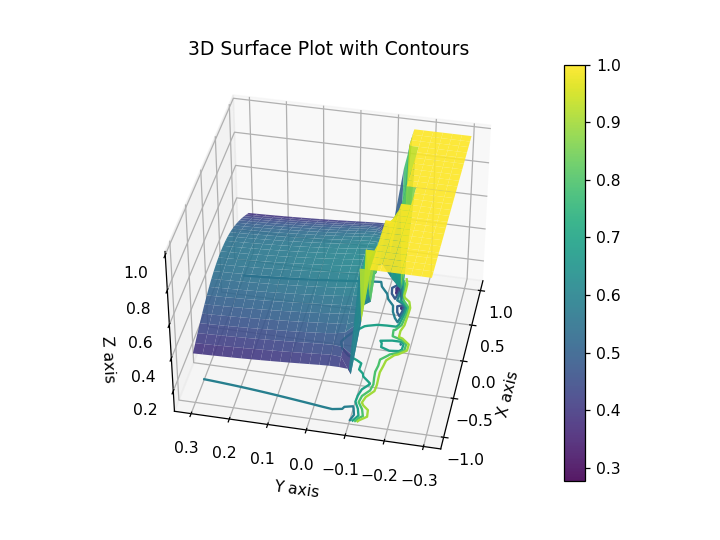

0.09293518884200068


Text(0.5, 0.92, '3D Surface Plot with Contours')

In [45]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create meshgrid
print("Max:", np.max(np.abs(func_arr_mc)))
Z = np.minimum(np.abs(func_arr_mc), 1)
# Z = np.minimum(np.abs(func_arr), 1)


# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9)

# Add contour lines on the bottom (zdir='z', offset=Z.min())
contours = ax.contour(X, Y, Z, zdir='z', offset=Z.min(), cmap='viridis')

print(np.min(Z))

# Add color bar
fig.colorbar(surf)

# Labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot with Contours')

<IPython.core.display.Javascript object>


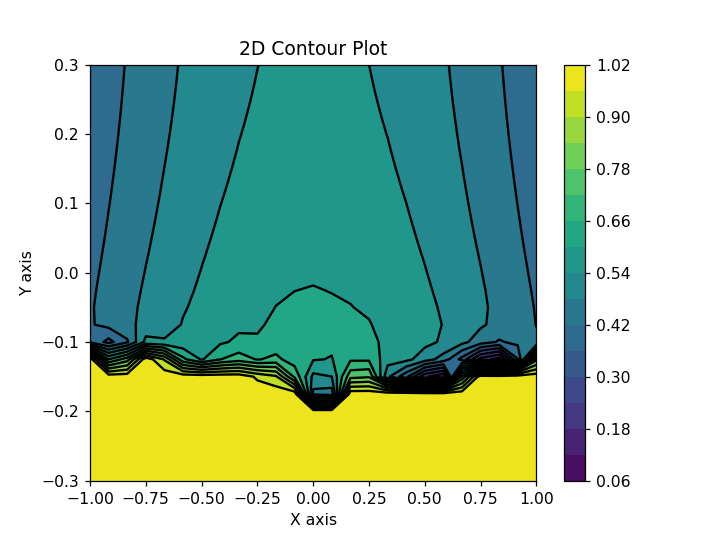

Text(0.5, 1.0, '2D Contour Plot')

In [46]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# Plot
fig, ax = plt.subplots()
contour_lines = ax.contour(X, Y, Z, levels=15, colors='black')  # Contour lines
contour_filled = ax.contourf(X, Y, Z, levels=15, cmap='viridis')  # Filled contours

# Add color bar
fig.colorbar(contour_filled)

# Labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('2D Contour Plot')

In [228]:
z0 = X.flatten()[np.argmin(Z)] + 1j * Y.flatten()[np.argmin(Z)]
z0

(0.09999999999999998-0.18j)

In [229]:
def fun(z):
    return f(z * np.ones(1), xi)

def fun_prime(z):
    return f_prime(z * np.ones(1), xi)

In [230]:
np.abs(fun(z0))

array([0.08924006])

In [231]:
z1 = root

In [232]:
from scipy.optimize import newton
import numpy as np


root = newton(fun, z0 + 0.001, fprime=fun_prime, maxiter=500)
print("Found root:", root, "Fun =", fun(root), "|Fun| =", np.abs(fun(root)))

Found root: [0.11709392-0.27765337j] Fun = [-1.13158612e-05-7.77063182e-06j] |Fun| = [1.3727033e-05]


__Argument principle__
$$
N - P = \dfrac{1}{2\pi i}\int_{\gamma}\dfrac{f'(z)}{f(z)}dz
$$

In [233]:
z0

(0.09999999999999998-0.18j)

In [290]:
phi = np.linspace(0, 2*np.pi, 1000)
r = 0.15

gamma = z0 + r * np.exp(1j * phi)

In [347]:
rng = np.random.default_rng(seed = 45)
K = 10**6
xi = rng.normal(0, 1, size=K)

def int_fun(z):
    return f_prime(z, xi) / f(z, xi)

def int_fun_2(z):
    return np.cos(z) / np.sin(z)

In [348]:
np.abs(f(z0, xi))

std: 2.9850872939488085


array([1.27179407])

In [327]:
int_fun_grid = np.array([int_fun(z) for z in gamma]).flatten()

std: 3.4284756724761594
std: 3.197051020384876
std: 2.981307278779982
std: 2.7801899735831856
std: 2.592714255293896
std: 2.417960440008722
std: 2.2550698230088235
std: 2.1032407493963614
std: 1.9617249270480688
std: 1.8298239679094368
std: 1.7068861443768464
std: 1.592303348208202
std: 1.4855082400660597
std: 1.385971578431347
std: 1.2931997172315168
std: 1.2067322621053544
std: 1.1261398757779726
std: 1.0510222235451956
std: 0.9810060503670645
std: 0.9157433815465663
std: 0.8549098394226874
std: 0.7982030689374596
std: 0.7453412653456737
std: 0.6960617977239618
std: 0.6501199223043239
std: 0.6072875800061043
std: 0.5673522728712527
std: 0.5301160144209263
std: 0.49539434924780645
std: 0.46301543743900286
std: 0.4328191996894563
std: 0.4046565192162426
std: 0.3783884968207499
std: 0.3538857556690911
std: 0.331027792571748
std: 0.3097023727422689
std: 0.28980496520215576
std: 0.2712382161756019
std: 0.25391145798404263
std: 0.23774025110702057
std: 0.22264595722316402
std: 0.2085553411

std: 0.0031212230390488534
std: 0.0031314473795367513
std: 0.003141939826197251
std: 0.0031527080334026866
std: 0.0031637600269602073
std: 0.003175104225953553
std: 0.003186749466148645
std: 0.0031987050250890437
std: 0.003210980649018302
std: 0.003223586581778419
std: 0.00323653359584668
std: 0.003249833025687714
std: 0.003263496803613147
std: 0.003277537498358603
std: 0.003291968356606368
std: 0.0033068033477026367
std: 0.0033220572118405375
std: 0.0033377455120044922
std: 0.003353884689998095
std: 0.003370492126906637
std: 0.0033875862083770124
std: 0.0034051863951321216
std: 0.003423313299174339
std: 0.0034419887661733847
std: 0.003461235964578109
std: 0.0034810794820398982
std: 0.00350154542978742
std: 0.0035226615556490535
std: 0.003544457366480396
std: 0.003566964260820354
std: 0.0035902156726706374
std: 0.0036142472273701922
std: 0.003639096910618739
std: 0.0036648052517920782
std: 0.003691415522786625
std: 0.00371897395373181
std: 0.0037475299670166953
std: 0.00377713643119142

std: 63318.05668676566
std: 65544.24434594832
std: 67819.06390226449
std: 70142.10592742977
std: 72512.87678046626
std: 74930.79654790579
std: 77395.1971259188
std: 79905.32045547175
std: 82460.3169214694
std: 85059.24392665345
std: 87701.06465074467
std: 90384.64700506606
std: 93108.76279248079
std: 95872.087082096
std: 98673.19780771137
std: 101510.57559846315
std: 104382.6038495797
std: 107287.5690404804
std: 110223.6613068456
std: 113188.97527252234
std: 116181.51114634714
std: 119199.17608821645
std: 122239.78584779805
std: 125301.06667845201
std: 128380.65752794051
std: 131476.11250659224
std: 134584.90363254203
std: 137704.42385268508
std: 140831.99033692907
std: 143964.84804225885
std: 147100.17354209558
std: 150235.0791152996
std: 153366.61708813524
std: 156491.78442142654
std: 159607.52753403338
std: 162710.7473527859
std: 165798.30457791348
std: 168867.0251520264
std: 171913.7059197246
std: 174935.12046395146
std: 177928.02510430777
std: 180889.1650416604
std: 183815.2806325

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


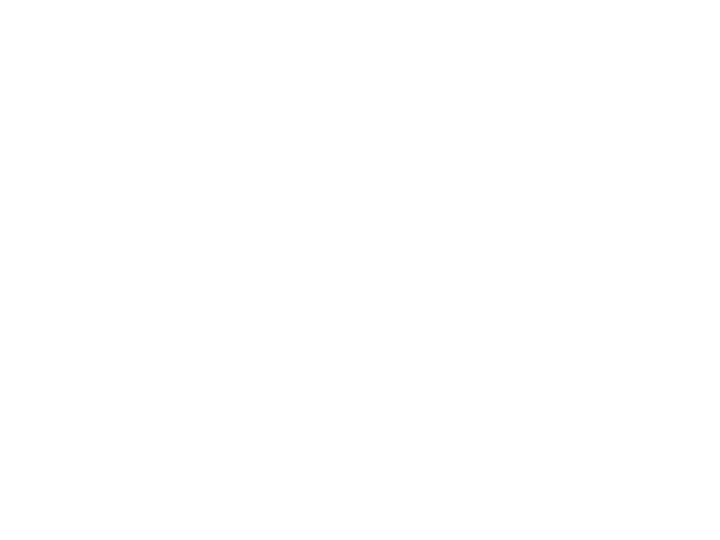

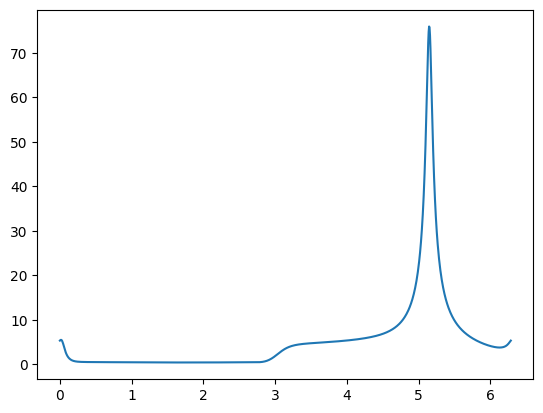

In [298]:
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(phi, np.abs(int_fun_grid))

In [300]:
np.trapz(int_fun_grid, gamma) / (2 * np.pi * 1j)

(-0.08884263647781622+0.06849606202033393j)

__Jensen's theorem__
$$
\int_0^R\dfrac{n_f(t)}{t}dt = \dfrac{1}{2\pi}\int_0^{2\pi}\log|f(Re^{i\phi})|d\phi - \log|f(0)|
$$

In [ ]:
def log_f(z, X):
    if not np.array(z).ndim:
        z = np.array([z])
    sample = np.absnp.exp(1j * (z[None, :] + X[:, None])**3)
    print("Max std:", 3 * np.max(np.std(sample, axis=0) / np.sqrt(X.size)))
    return np.mean(sample, axis=0)

In [11]:
rng = np.random.default_rng(seed=42)
size = 10**5
xi = rng.normal(size=size)
xi_sharp = rng.normal(size=100*size)

f0 = f(0, xi_sharp)
f0

std: [0.00076111]


array([0.59694911+0.00024516j])

In [24]:
log_f0 = np.log(np.abs(f0))
log_f0

array([-0.51592333])

In [43]:
phi = np.linspace(0, 2*np.pi, 1000)
r = 0.15

gamma = r * np.exp(1j * phi)

In [44]:
def int_fun(z):
    return np.log(np.abs(f(z, xi)))

In [45]:
int_fun_grid = int_fun(gamma)
# int_fun_grid = np.array([int_fun(z) for z in gamma]).flatten()

Max std: 2.4584500185069182


<IPython.core.display.Javascript object>


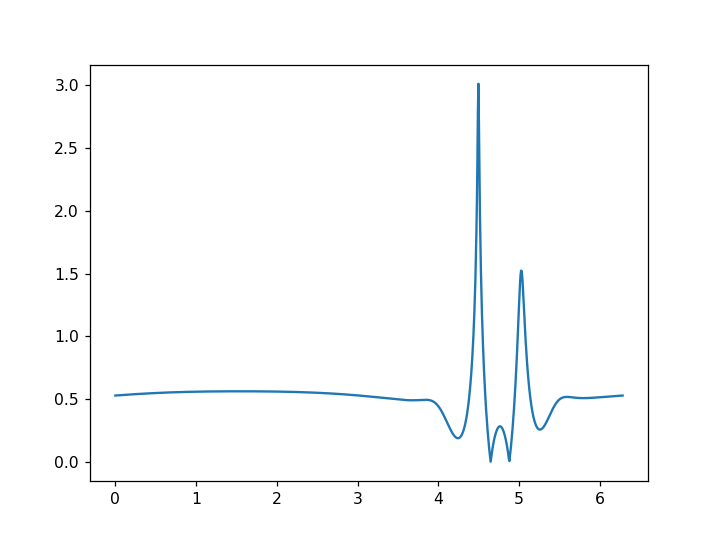

In [48]:
fig, ax = plt.subplots()

ax.plot(phi, np.abs(int_fun_grid))

In [49]:
np.trapz(int_fun_grid, phi) / (2 * np.pi) - log_f0

array([-0.00256257])

<IPython.core.display.Javascript object>


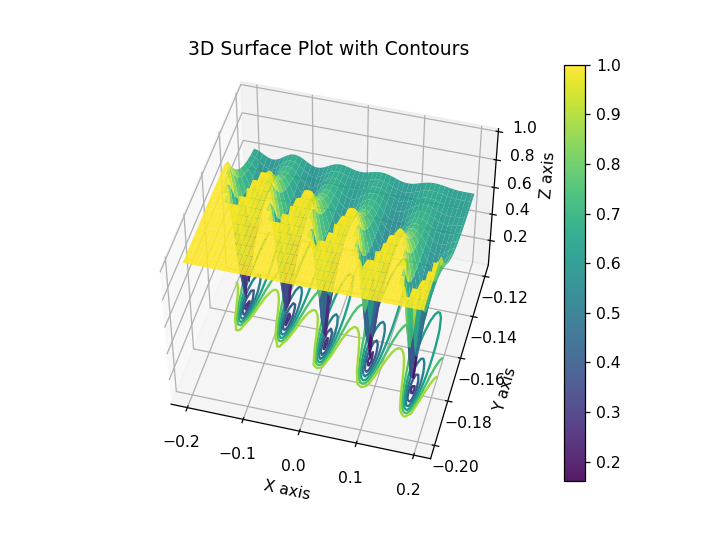

0.028914616783742852


Text(0.5, 0.92, '3D Surface Plot with Contours')

In [124]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create meshgrid
Z = np.minimum(np.abs(func_arr_mc), 1)
# Z = np.minimum(np.abs(func_arr), 1)


# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9)

# Add contour lines on the bottom (zdir='z', offset=Z.min())
contours = ax.contour(X, Y, Z, zdir='z', offset=Z.min(), cmap='viridis')

print(np.min(Z))

# Add color bar
fig.colorbar(surf)

# Labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot with Contours')

<IPython.core.display.Javascript object>


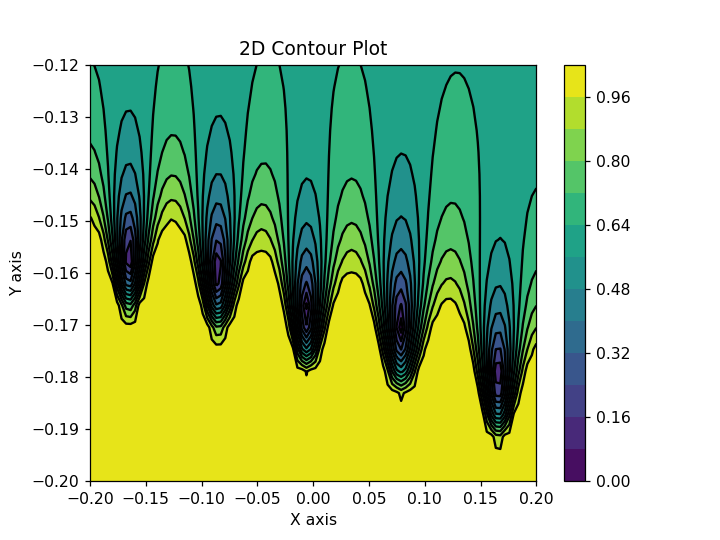

Text(0.5, 1.0, '2D Contour Plot')

In [125]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# Plot
fig, ax = plt.subplots()
contour_lines = ax.contour(X, Y, Z, levels=15, colors='black')  # Contour lines
contour_filled = ax.contourf(X, Y, Z, levels=15, cmap='viridis')  # Filled contours

# Add color bar
fig.colorbar(contour_filled)

# Labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('2D Contour Plot')